In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential, models
from keras.preprocessing.image import ImageDataGenerator
import pathlib

2023-04-30 16:27:47.361651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("fish/",
    seed=12,
    shuffle=True,
    image_size=(256, 256),
    batch_size=16
)

Found 40 files belonging to 2 classes.


In [3]:
class_names = dataset.class_names
class_names

['Fresh', 'NonFresh']

2023-04-30 16:27:51.079942: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [40]
	 [[{{node Placeholder/_4}}]]
2023-04-30 16:27:51.080446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [40]
	 [[{{node Placeholder/_4}}]]


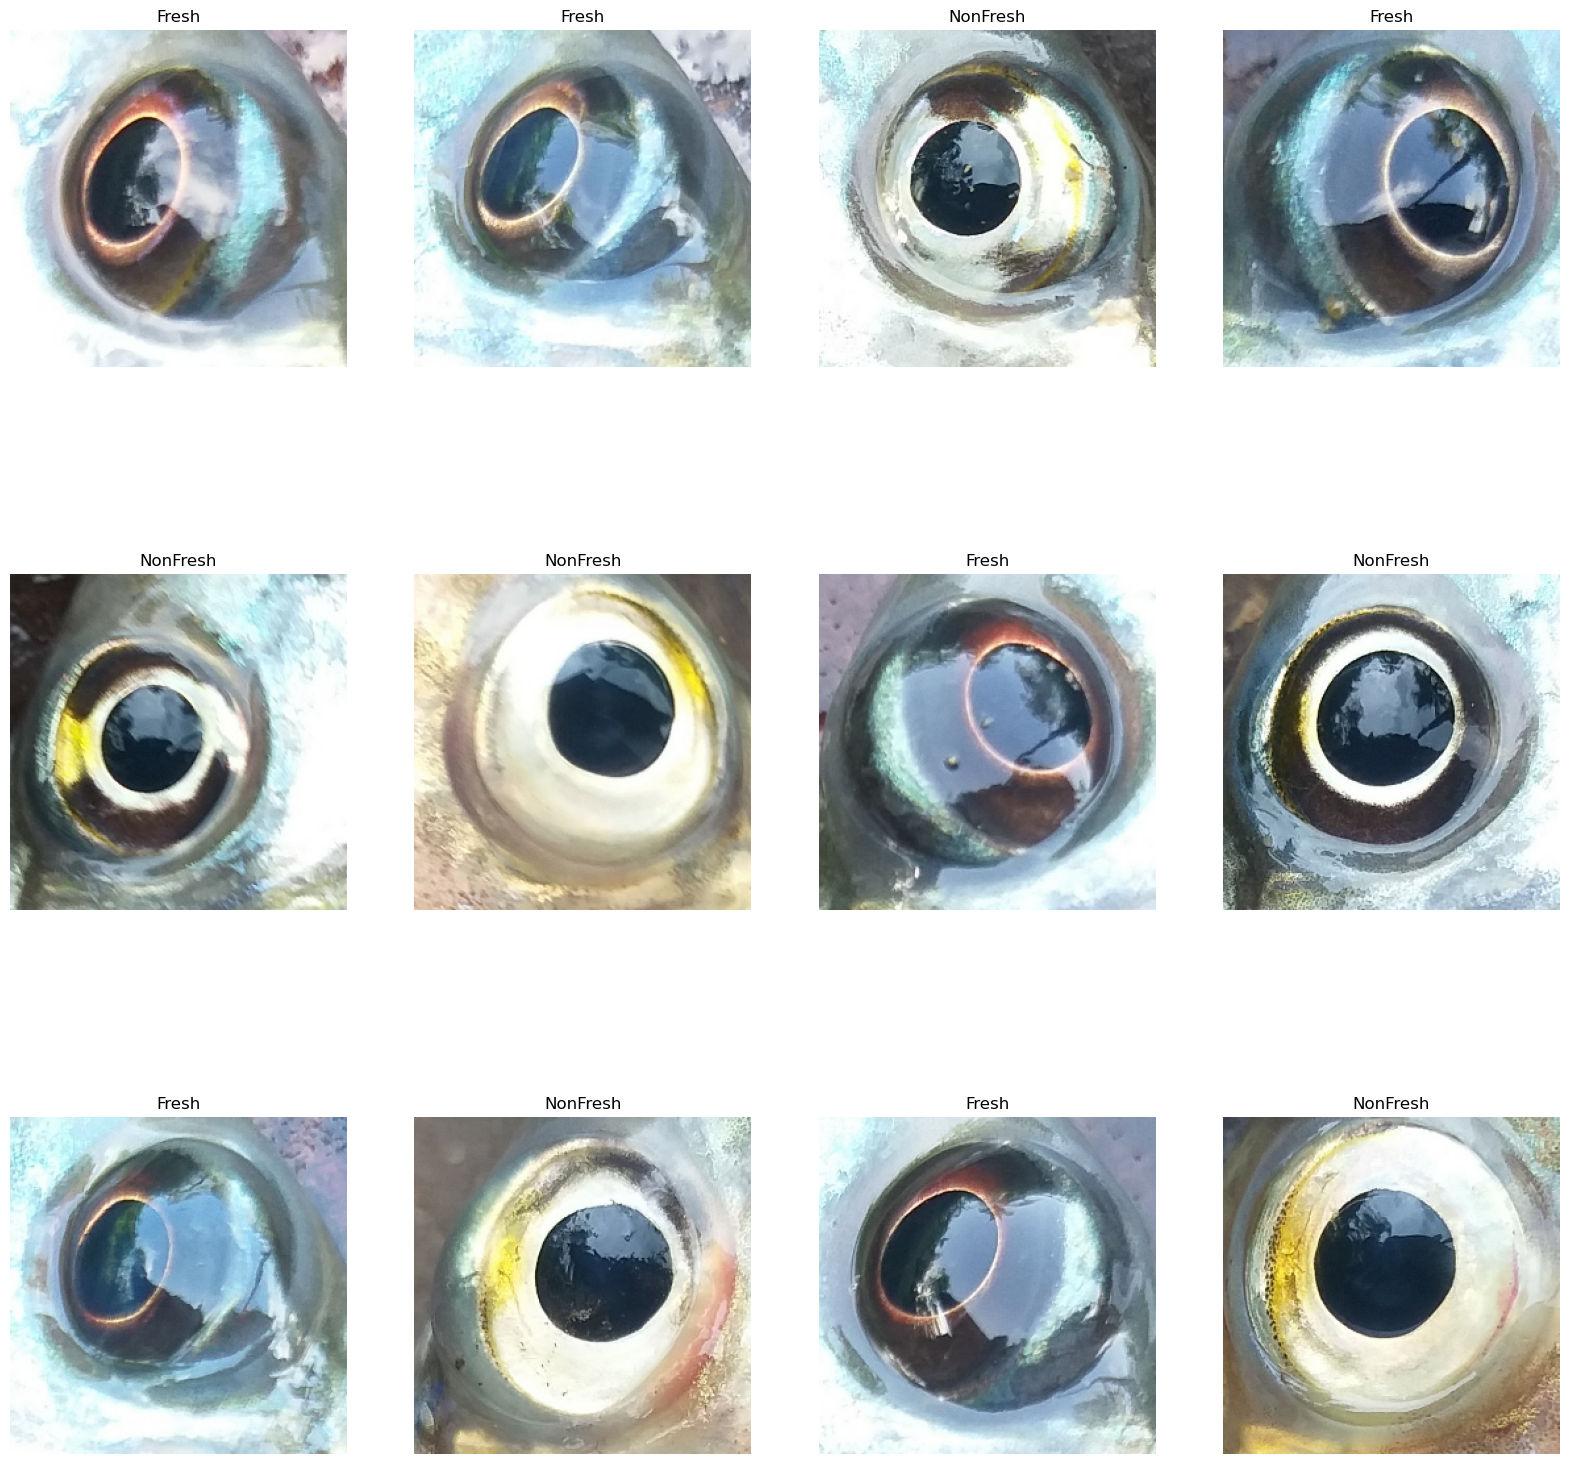

In [4]:
plt.figure(figsize=(20, 20))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [5]:
import splitfolders
splitfolders.ratio(r'fish', output="output", ratio=(.8, 0.17,0.03)) 

Copying files: 40 files [00:00, 1664.22 files/s]


In [6]:
# in order to make sure that all the input images are of same scale, we are using ImageDataGenerator (for data augmentation)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   vertical_flip = True,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('output/train/',
                                                 target_size = (256, 256),
                                                 batch_size = 16,
                                                 class_mode = 'binary') 

Found 32 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('output/val',
                                            target_size = (256, 256),
                                            batch_size = 16,
                                            class_mode = 'binary')

Found 6 images belonging to 2 classes.


In [8]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,
                               kernel_size=3,
                               activation='relu',
                               input_shape=[256, 256, 3]))

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                  strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=256,
                               kernel_size=3,
                               activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                  strides=2))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=256,
                              activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dense(units=1,
                              activation='sigmoid'))

In [15]:
cnn.compile(optimizer = 'adam',
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

In [16]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10


2023-04-30 16:27:54.084986: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - ETA: 0s - loss: 21.2470 - accuracy: 0.5000

2023-04-30 16:28:02.728487: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 9s 4s/step - loss: 21.2470 - accuracy: 0.5000 - val_loss: 22.7087 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 8s 4s/step - loss: 16.1516 - accuracy: 0.5000 - val_loss: 1.1705 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 8s 4s/step - loss: 1.0843 - accuracy: 0.6250 - val_loss: 0.8924 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 10s 5s/step - loss: 0.7971 - accuracy: 0.5000 - val_loss: 0.6818 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 9s 5s/step - loss: 0.6767 - accuracy: 0.5625 - val_loss: 0.6348 - val_accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 10s 6s/step - loss: 0.6328 - accuracy: 0.5000 - val_loss: 0.5938 - val_accuracy: 0.8333
Epoch 7/10
2/2 [==============================] - 11s 5s/step - loss: 0.5897 - accuracy: 0.5938 - val_loss: 0.4735 - val_accuracy: 0.6667
Epoch 8/10
2/2 [==============================

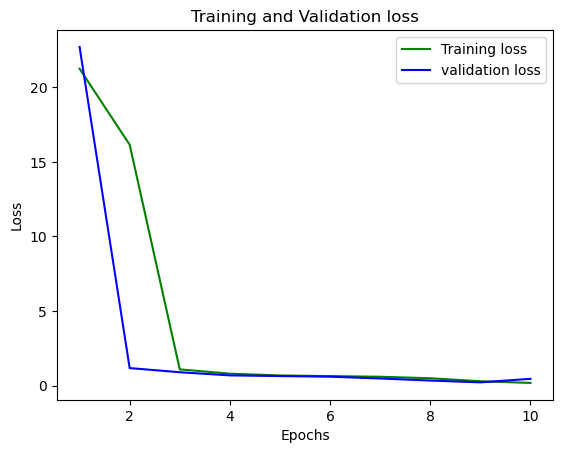

In [17]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

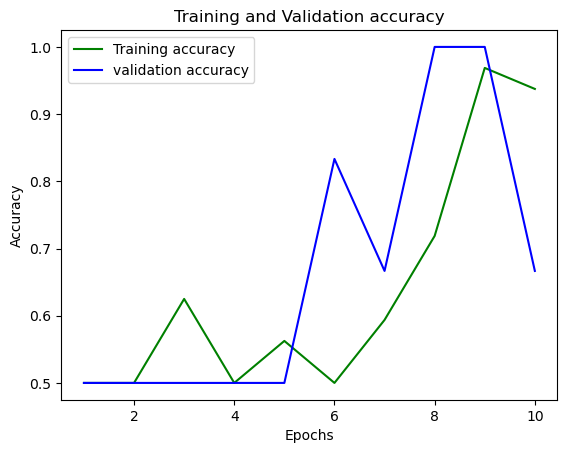

In [18]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
import os
import glob
testFresh = os.path.join('output/test/Fresh', '*')
testFresh = glob.glob(testFresh)
testNonFresh = os.path.join('output/test/NonFresh', '*')
testNonFresh = glob.glob(testNonFresh)

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np
y_pred=[]
for i in range(len(testFresh)):
    path= testFresh[i]
    test_image = image.load_img(path, target_size = (256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    #training_set.class_indices
    y_pred.append(int(result))
    if result[0][0] == 1:
      prediction = 'NonFresh'
    else:
      prediction = 'Fresh'
    print(prediction)


1/1 [==============================] - 0s 224ms/step
Fresh


In [21]:
from tensorflow.keras.preprocessing import image
import numpy as np
y_pred=[]
for i in range(len(testNonFresh)):
    path= testNonFresh[i]
    test_image = image.load_img(path, target_size = (256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    #training_set.class_indices
    y_pred.append(int(result))
    if result[0][0] == 1:
      prediction = 'NonFresh'
    else:
      prediction = 'Fresh'
    print(prediction)


1/1 [==============================] - 0s 145ms/step
NonFresh


In [22]:
cnn.save('fish.h5')

In [23]:
def guess(img):
    import tensorflow as tf
    from tensorflow.keras.preprocessing import image
    import numpy as np
    cnn = tf.keras.models.load_model('fish.h5')
    test_image = image.load_img(img, target_size = (256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    if result[0][0] == 1:
      prediction = 'NonFresh'
    else:
      prediction = 'Fresh'
    return prediction

1/1 [==============================] - 1s 737ms/step
Image is Fresh


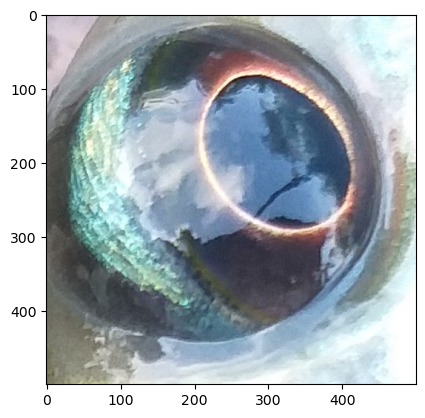

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('output/test/Fresh/20200517_085346.jpg')
imgplot = plt.imshow(img)
result=guess('output/test/Fresh/20200517_085346.jpg')
print(f"Image is {result}")